# COVID-19 Victim Exploration (Gender and age)

This is a covid-19 data exploration project that focus at virus impact on specific age and gender

In [36]:
# Import required module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Load data
df_patient = pd.read_csv("COVID19_open_line_list.csv", index_col=0)

# Remove unnamed column
df_patient = df_patient.loc[:, ~df_patient.columns.str.contains('^Unnamed')]

# Remove empty row
df_patient = df_patient.dropna(how='all', axis='rows')

display(df_patient)

,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
ID,,,,,,,,,,,,,,,,,,,,,
1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,18.01.2020,...,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,10.01.2020,...,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,10.01.2020,...,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13475.0,60-69,male,Nagoya City,Aichi Prefecture,Japan,1.0,NaN,NaN,NaN,27.02.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13476.0,40-49,female,NaN,Osaka,Japan,1.0,NaN,NaN,NaN,19.02.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13477.0,0-10,female,NaN,Osaka,Japan,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Describe data
df_patient.describe(include='all')

,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
count,1349,1264,10194,12906,13148,13170.0,13147.000000,13147.000000,13147,746,...,184,93,187,1024,1159,9068,12877,13079,13103,17
unique,116,5,806,150,51,NaN,NaN,NaN,7,64,...,12,38,47,186,280,302,148,46,661,1
top,50-59,male,Wenzhou City,Guangdong,China,NaN,NaN,NaN,admin2,22.01.2020,...,stable,26.02.2020,Could be some cases from 23rd,Yokohama Port,Wanzhou District,Wenzhou City,Guangdong,China,19,SL
freq,47,703,448,1228,10446,NaN,NaN,NaN,7960,43,...,78,8,91,479,65,448,1228,10446,575,17
mean,NaN,NaN,NaN,NaN,NaN,1.0,31.994650,110.495353,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.0,7.536335,27.985144,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.0,-37.813600,-124.953070,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.0,27.905380,111.729600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.0,31.759410,115.441800,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.0,35.781340,120.440400,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Look at metadata
df_patient.dtypes

age                          object
sex                          object
city                         object
province                     object
country                      object
wuhan(0)_not_wuhan(1)       float64
latitude                    float64
longitude                   float64
geo_resolution               object
date_onset_symptoms          object
date_admission_hospital      object
date_confirmation            object
symptoms                     object
lives_in_Wuhan               object
travel_history_dates         object
travel_history_location      object
reported_market_exposure     object
additional_information       object
chronic_disease_binary      float64
chronic_disease              object
source                       object
sequence_available           object
outcome                      object
date_death_or_discharge      object
notes_for_discussion         object
location                     object
admin3                       object
admin2                      

In [40]:
# Want to know number of na in each column
df_patient.isnull().sum()

age                         11825
sex                         11910
city                         2980
province                      268
country                        26
wuhan(0)_not_wuhan(1)           4
latitude                       27
longitude                      27
geo_resolution                 27
date_onset_symptoms         12428
date_admission_hospital     12444
date_confirmation              85
symptoms                    12681
lives_in_Wuhan              12609
travel_history_dates        12671
travel_history_location     12416
reported_market_exposure    13139
additional_information      10762
chronic_disease_binary      13156
chronic_disease             13161
source                        224
sequence_available          13173
outcome                     12990
date_death_or_discharge     13081
notes_for_discussion        12987
location                    12150
admin3                      12015
admin2                       4106
admin1                        297
country_new   

In [41]:
# Choose useful column, including age, sex, city, province, country, date_onset_symptoms, date_admission_hospital, date_confirmation, chronic_disease_binary, outcome, date_death_or_discharge
df_patient = df_patient[['age', 'sex', 'city', 'province', 'country', 'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation', 'chronic_disease_binary', 'outcome', 'date_death_or_discharge']]

In [42]:
# Explore all column data frequency (uncomment one)
# df_patient['age'].value_counts().to_dict()
# df_patient['sex'].value_counts().to_dict()
# df_patient['city'].value_counts().to_dict()
# df_patient['province'].value_counts().to_dict()
# df_patient['country'].value_counts().to_dict()
# df_patient['date_onset_symptoms'].value_counts().to_dict()
# df_patient['date_admission_hospital'].value_counts().to_dict()
df_patient['date_confirmation'].value_counts().to_dict()
# df_patient['chronic_disease_binary'].value_counts().to_dict()
# df_patient['outcome'].value_counts().to_dict()
# df_patient['date_death_or_discharge'].value_counts().to_dict()

# sns.countplot(x='age',data=df_patient)
# sns.countplot(x='sex',data=df_patient)
# sns.countplot(x='city',data=df_patient)
# sns.countplot(x='province',data=df_patient)
# sns.countplot(x='country',data=df_patient)
# sns.countplot(x='date_onset_symptoms',data=df_patient)
# sns.countplot(x='date_admission_hospital',data=df_patient)
# sns.countplot(x='date_confirmation',data=df_patient)
# sns.countplot(x='chronic_disease_binary',data=df_patient)
# sns.countplot(x='outcome',data=df_patient)
# sns.countplot(x='date_death_or_discharge',data=df_patient)


{'29.01.2020': 1091,
 '03.02.2020': 873,
 '31.01.2020': 813,
 '05.02.2020': 802,
 '04.02.2020': 749,
 '27.01.2020': 729,
 '01.02.2020': 714,
 '02.02.2020': 668,
 '06.02.2020': 613,
 '08.02.2020': 525,
 '07.02.2020': 523,
 '26.01.2020': 440,
 '30.01.2020': 424,
 '26.02.2020': 323,
 '22.02.2020': 313,
 '27.02.2020': 313,
 '25.01.2020': 292,
 '28.02.2020': 281,
 '13.02.2020': 257,
 '15.02.2020': 222,
 '16.02.2020': 203,
 '24.02.2020': 192,
 '25.02.2020': 189,
 '14.02.2020': 188,
 '28.01.2020': 179,
 '17.02.2020': 148,
 '23.02.2020': 143,
 '24.01.2020': 142,
 '18.02.2020': 110,
 '10.02.2020': 97,
 '23.01.2020': 93,
 '12.02.2020': 84,
 '09.02.2020': 70,
 '11.02.2020': 67,
 '21.02.2020': 55,
 '22.01.2020': 42,
 '21.01.2020': 38,
 '20.02.2020': 36,
 '19.02.2020': 26,
 '20.01.2020': 11,
 '25.02.2020-26.02.2020': 5,
 '29.02.2020': 1,
 '12.01.2020': 1,
 '19.01.2020': 1,
 '17.01.2020': 1,
 '15.01.2020': 1,
 '16.01.2020': 1}

We do data cleaning with description below

1. Set `age` data in form of range value (ex: 20-29) as median value, long range value (ex: 38-68) as NA, and invalid value (e.g. string value) as NA
2. In `sex` column, rename Female to female and MALE to male, and set invalid value as NA
3. In `date_onset_symptoms` column, set '10.01.2020 - 22.01.2020', 'none', and 'end of December 2019' as NA and set '-25.02.2020' as '25.02.2020'. And convert it to datetime data type.
4. In `date_admission_hospital` column, set '18.01.2020 - 23.01.2020' as NA. And convert it to datetime data type.
5. In `date_confirmation` column, set '25.02.2020-26.02.2020' as NA. And convert it to datetime data type.
6. Simplify `outcome` value into four category i.e. stable, discharged, died, critical. Set other unknown category as NA
7. Set 'discharge' value as NA in `date_death_or_discharge` column
8. Add 'age_group' column

In [43]:
# Data cleaning
df_clean = df_patient.copy()

# 1
for data in df_clean['age'].unique().astype(str):
    if data.find('-') != -1:
        temp = data.split('-')
        if int(temp[1])-int(temp[0]) < 15:
            median = ( int(temp[1])+int(temp[0]) ) / 2
            df_clean.age = df_clean.age.replace({data:median})
        else:
            df_clean.age = df_clean.age.replace({data:np.nan})

df_clean.age = df_clean.age.replace({
    'Belgium':np.nan})
df_clean['age'] = df_clean['age'].astype(float)
print(df_clean['age'].unique())

# 2
df_clean.sex = df_clean.sex.replace(
    {'Female':'female',
    'Male':'male',
    '4000':np.nan})
print(df_clean['sex'].unique())

# 3
df_clean.date_onset_symptoms = df_clean.date_onset_symptoms.replace({
    '10.01.2020 - 22.01.2020':np.nan,
    'none':np.nan,
    'end of December 2019':np.nan,
    '-25.02.2020':'25.02.2020',
    '01.31.2020':'31.01.2020',
    '01.05.2020':'05.01.2020'
})
print(df_clean['date_onset_symptoms'].unique())

# 4
df_clean.date_admission_hospital = df_clean.date_admission_hospital.replace({
    '18.01.2020 - 23.01.2020':np.nan
})
print(df_clean['date_admission_hospital'].unique())

# 5
df_clean.date_confirmation = df_clean.date_confirmation.replace({
    '25.02.2020-26.02.2020':'25.02.2020'
})
print(df_clean['date_confirmation'].unique())

# 6
df_clean.outcome = df_clean.outcome.replace({
    'recovered':'discharged',
    'discharge':'discharged',
    'death':'died',
    'dead':'died',
    'Discharged':'discharged',
    '05.02.2020':np.nan,
    'critical condition, intubated as of 14.02.2020':np.nan,
    'treated in an intensive care unit (14.02.2020)':np.nan,
    'Symptoms only improved with cough. Currently hospitalized for follow-up.':np.nan,
    'severe':np.nan,
    'stable':np.nan,
    'critical':np.nan
})
df_clean.outcome = df_clean.outcome.replace({
    np.nan:'confirmed'
})
print(df_clean['outcome'].unique())

# 7
df_clean.date_death_or_discharge = df_clean.date_death_or_discharge.replace({
    'discharge':np.nan
})
print(df_clean['date_death_or_discharge'].unique())

# 8
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)
print(df_clean['age_group'].unique())

[3.0000e+01 4.7000e+01 4.9000e+01 5.0000e+01        nan 4.2000e+01
 5.9000e+01 3.9000e+01 3.8000e+01 4.5000e+01 3.3000e+01 3.7000e+01
 3.2000e+01 1.8000e+01 5.6000e+01 4.4000e+01 6.5000e+01 2.1000e+01
 4.1000e+01 7.0000e+01 4.3000e+01 3.1000e+01 2.4000e+01 4.0000e+01
 6.6000e+01 3.6000e+01 1.0000e+01 6.3000e+01 7.8000e+01 7.6000e+01
 4.8000e+01 6.2000e+01 4.6000e+01 3.4000e+01 7.2000e+01 2.0000e+01
 5.4000e+01 2.0000e+00 2.9000e+01 6.1000e+01 5.1000e+01 8.0000e+01
 6.9000e+01 2.8000e+01 5.5000e+01 6.8000e+01 5.7000e+01 3.5000e+01
 2.7000e+01 5.2000e+01 2.2000e+01 2.3000e+01 8.8000e+01 1.9000e+01
 6.0000e+01 5.8000e+01 5.3000e+01 2.5000e+01 4.0500e+01 2.6000e+01
 6.4000e+01 3.4500e+01 1.1000e+01 5.4500e+01 7.3000e+01 7.4000e+01
 7.0000e+00 8.2000e+01 6.7000e+01 1.5000e+01 1.6000e+01 6.4500e+01
 4.4500e+01 8.4500e+01 3.3500e+01 5.0000e+00 3.0000e+00 4.0000e+00
 7.1000e+01 2.4500e+01 7.7000e+01 7.5000e+01 9.4000e+01 8.1000e+01
 5.8333e-01 1.7000e+01 8.0000e+00 9.0000e+00 8.3330e-02 1.2000

In [44]:
df_clean.describe(include='all')

,age,sex,city,province,country,date_onset_symptoms,date_admission_hospital,date_confirmation,chronic_disease_binary,outcome,date_death_or_discharge,age_group
count,1212.000000,1263,10194,12906,13148,739,725,13089,18.000000,13174,91,1212
unique,NaN,2,806,150,51,59,54,46,NaN,3,37,10
top,NaN,male,Wenzhou City,Guangdong,China,22.01.2020,30.01.2020,29.01.2020,NaN,confirmed,26.02.2020,30-39
freq,NaN,707,448,1228,10446,43,45,1091,NaN,13073,8,245
mean,45.076045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.722222,NaN,NaN,NaN
std,17.620734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460889,NaN,NaN,NaN
min,0.083330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,NaN,NaN,NaN
50%,44.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,56.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN


In [45]:
df_clean_age_sex = df_clean.dropna(subset=['age','sex','date_confirmation'], how='any')
df_clean_age_sex['date_confirmation'] = pd.to_datetime(df_clean_age_sex['date_confirmation'],dayfirst=True)
df_clean_age_sex = df_clean_age_sex[['age','sex','date_confirmation','outcome','age_group']]
display(df_clean_age_sex)
df_clean_age_sex.describe(include='all')

C:\Users\marfa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,sex,date_confirmation,outcome,age_group
ID,,,,,
1.0,30.0,male,2020-01-22,confirmed,30-39
2.0,47.0,male,2020-01-23,confirmed,40-49
3.0,49.0,male,2020-01-23,confirmed,40-49
4.0,47.0,female,2020-01-23,confirmed,40-49
5.0,50.0,female,2020-01-23,confirmed,50-59
...,...,...,...,...,...
13473.0,64.5,male,2020-02-28,confirmed,60-69
13474.0,54.5,male,2020-02-28,confirmed,50-59
13475.0,64.5,male,2020-02-28,confirmed,60-69


,age,sex,date_confirmation,outcome,age_group
count,1176.000000,1176,1176,1176,1176
unique,NaN,2,45,3,10
top,NaN,male,2020-02-02 00:00:00,confirmed,40-49
freq,NaN,672,65,1099,238
first,NaN,NaN,2020-01-12 00:00:00,NaN,NaN
last,NaN,NaN,2020-02-28 00:00:00,NaN,NaN
mean,45.213506,NaN,NaN,NaN,NaN
std,17.502754,NaN,NaN,NaN,NaN
min,0.083330,NaN,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN


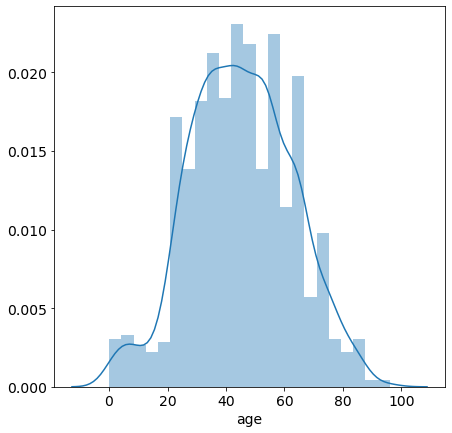

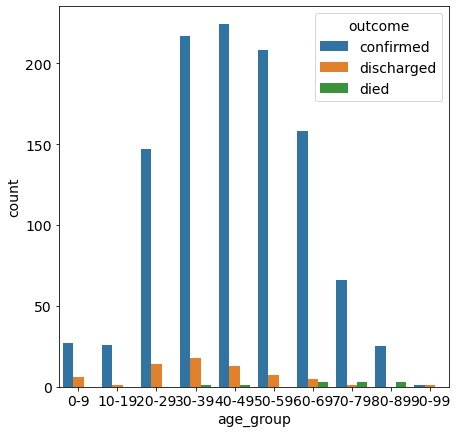

,age_group,all,died,discharged,mortality_rate
0,0-9,33,0,6,0.000000
1,10-19,27,0,1,0.000000
2,20-29,161,0,14,0.000000
3,30-39,236,1,18,0.004237
4,40-49,238,1,13,0.004202
5,50-59,215,0,7,0.000000
6,60-69,166,3,5,0.018072
7,70-79,70,3,1,0.042857
8,80-89,28,3,0,0.107143
9,90-99,2,0,1,0.000000


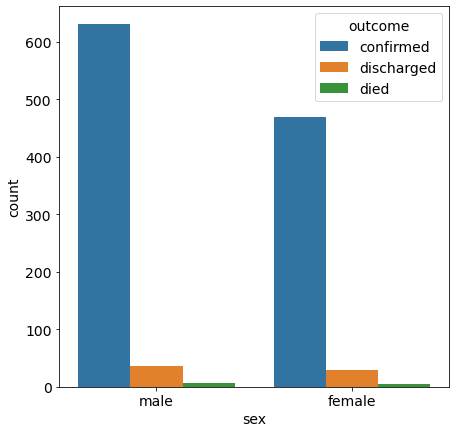

,sex,all,died,discharged,mortality_rate
0,female,504,5,30,0.009921
1,male,672,6,36,0.008929


In [46]:
# Age and sex distribution
sns.distplot(df_clean_age_sex['age'])
plt.show()

# Group by age
sns.countplot(x='age_group',hue='outcome',data=df_clean_age_sex)
plt.show()

all_age = df_clean_age_sex.groupby(['age_group']).size().reset_index(name='all')
died_age = df_clean_age_sex[df_clean_age_sex['outcome']=='died'].groupby(['age_group']).size().reset_index(name='died')
discharged_age = df_clean_age_sex[df_clean_age_sex['outcome']=='discharged'].groupby(['age_group']).size().reset_index(name='discharged')

mortality_age = all_age.merge(died_age)
mortality_age = mortality_age.merge(discharged_age)
mortality_age['mortality_rate'] = mortality_age['died']/mortality_age['all']
display(mortality_age)

# Group by sex
sns.countplot(x='sex',hue='outcome',data=df_clean_age_sex)
plt.show()

all_sex = df_clean_age_sex.groupby(['sex']).size().reset_index(name='all')
died_sex = df_clean_age_sex[df_clean_age_sex['outcome']=='died'].groupby(['sex']).size().reset_index(name='died')
discharged_sex = df_clean_age_sex[df_clean_age_sex['outcome']=='discharged'].groupby(['sex']).size().reset_index(name='discharged')

mortality_sex = all_sex.merge(died_sex)
mortality_sex = mortality_sex.merge(discharged_sex)
mortality_sex['mortality_rate'] = mortality_sex['died']/mortality_sex['all']
display(mortality_sex)

,date_confirmation,age_group,count,cum_sum,cum_perc
0,2020-01-12,60-69,1,1,0.085034
1,2020-01-15,30-39,1,1,0.085034
2,2020-01-16,30-39,1,2,0.170068
3,2020-01-17,70-79,1,1,0.085034
4,2020-01-19,60-69,1,2,0.170068
...,...,...,...,...,...
268,2020-02-28,40-49,4,238,20.238095
269,2020-02-28,50-59,3,215,18.282313
270,2020-02-28,60-69,8,166,14.115646
271,2020-02-28,70-79,1,70,5.952381


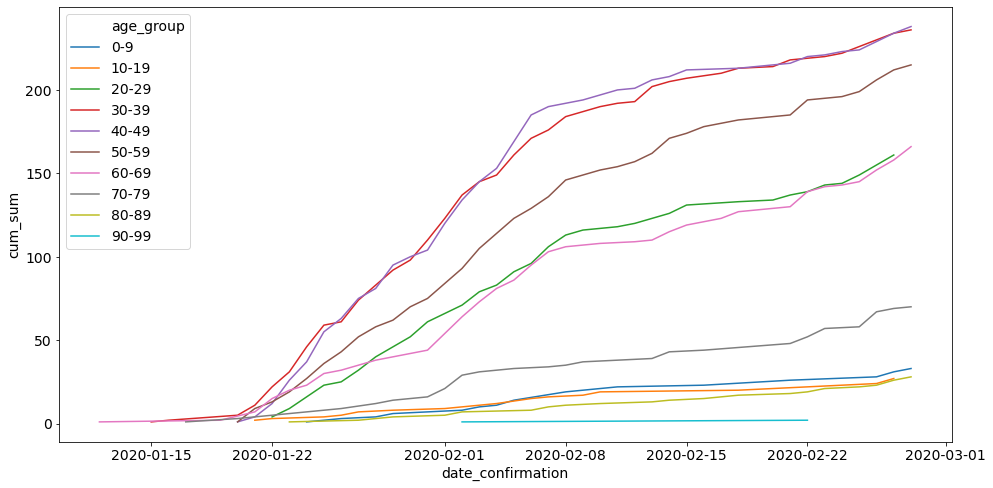

,date_confirmation,sex,count,cum_sum,cum_perc
0,2020-01-12,female,1,1,0.085034
1,2020-01-15,male,1,1,0.085034
2,2020-01-16,male,1,2,0.170068
3,2020-01-17,female,1,2,0.170068
4,2020-01-19,male,1,3,0.255102
...,...,...,...,...,...
78,2020-02-26,male,32,629,53.486395
79,2020-02-27,female,8,495,42.091837
80,2020-02-27,male,30,659,56.037415
81,2020-02-28,female,9,504,42.857143


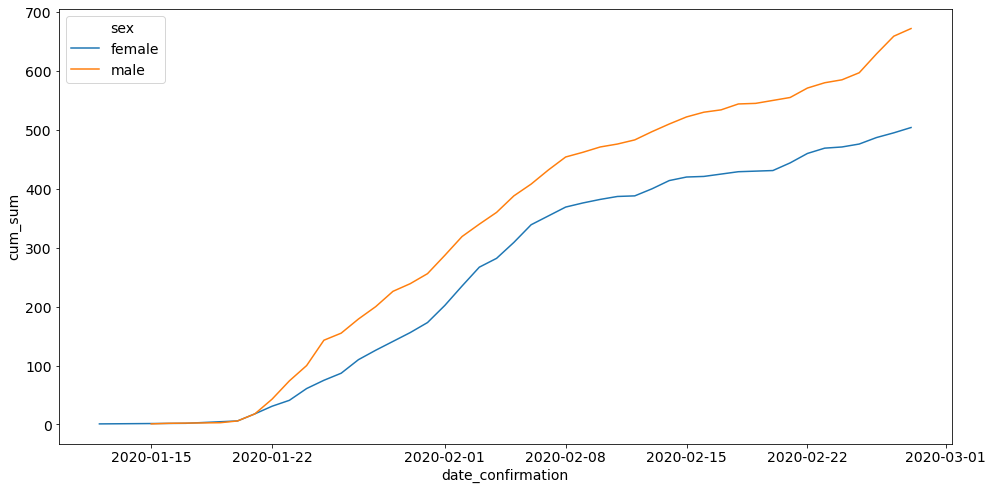

In [52]:
# Trend by age and gender
time_age = df_clean_age_sex.groupby(['date_confirmation','age_group']).size().reset_index(name='count')
time_age['cum_sum'] = time_age.groupby(['age_group'])['count'].cumsum()
time_age['cum_perc'] = 100*time_age['cum_sum']/time_age['count'].sum()
display(time_age)
plt.figure(figsize=(16,8))
sns.lineplot(x='date_confirmation',y='cum_sum',hue_order=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'],hue='age_group',data=time_age)
plt.show()

# sns.lineplot(x='date_confirmation',y='cum_perc',hue='age_group',data=time_age)
# plt.show()

time_sex = df_clean_age_sex.groupby(['date_confirmation','sex']).size().reset_index(name='count')
time_sex['cum_sum'] = time_sex.groupby(['sex'])['count'].cumsum()
time_sex['cum_perc'] = 100*time_sex['cum_sum']/time_sex['count'].sum()
display(time_sex)
plt.figure(figsize=(16,8))
sns.lineplot(x='date_confirmation',y='cum_sum',hue='sex',data=time_sex)
plt.show()
# sns.lineplot(x='date_confirmation',y='cum_perc',hue='sex',data=time_sex)
# plt.show()

# Prediction Time!!

60-69
fit: 
(array([  6.6680798 ,  34.19483026, 150.73509652]), array([[ 0.21280427,  0.16299035,  1.32083508],
       [ 0.16299035,  0.32550354,  1.81248368],
       [ 1.32083508,  1.81248368, 14.63815657]]))
errors
[0.46130713471208923, 0.5705291770649016, 3.8259843921639067]
sol
69
30-39
fit: 
(array([  5.05095242,  30.2026599 , 222.89741565]), array([[0.04159881, 0.01725577, 0.28700096],
       [0.01725577, 0.0536967 , 0.36207181],
       [0.28700096, 0.36207181, 5.63647792]]))
errors
[0.20395787497114673, 0.2317254901145773, 2.374126769102883]
sol
58
70-79
fit: 
(array([ 8.93152645, 39.66807103, 72.16420996]), array([[ 1.39112779,  2.11304822,  6.08525022],
       [ 2.11304822,  4.29736873, 11.69637313],
       [ 6.08525022, 11.69637313, 34.84759427]]))
errors
[1.1794608047714736, 2.073009583608644, 5.903185095329452]
sol
94
40-49
fit: 
(array([  4.48930135,  30.05520026, 223.23723766]), array([[0.0428797 , 0.01526552, 0.28661104],
       [0.01526552, 0.05508499, 0.36627176],
    

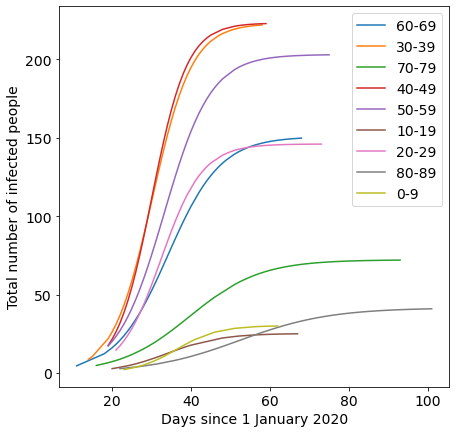

In [48]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

for age_group in time_age['age_group'].unique():
    print(age_group)
    df_log = time_age.loc[time_age['age_group']==age_group]

    if len(df_log) > 2:
        FMT = '%Y-%m-%d %H:%M:%S'
        date = df_log['date_confirmation']
        df_log['date_confirmation'] = date.map(lambda x : (x - datetime.strptime("2020-01-01 00:00:00", FMT)).days)

        # display(df_log)

        def logistic_model(x,a,b,c):
            return c/(1+np.exp(-(x-b)/a))

        x = list(df_log['date_confirmation'])
        y = list(df_log['cum_sum'])

        p0 = np.random.exponential(size=3)

        bounds = (0, [100000.,3.,1000000000.])

        fit = curve_fit(logistic_model,x,y,p0=[2,100,20000])
        # fit = curve_fit(logistic_model,x,y,bounds=bounds,p0=p0)

        print('fit: ')
        print(fit)
        a = fit[0][0]
        b = fit[0][1]
        c = fit[0][2]

        errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
        print('errors')
        print(errors)

        sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
        print('sol')
        print(sol)

        pred_x = list(range(max(x),sol))
        plt.rcParams['figure.figsize'] = [7, 7]
        plt.rc('font', size=14)
        # Real data
        # plt.scatter(x,y,label="Real data",color="red")
        # Predicted logistic curve
        plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label=age_group)
        # Predicted exponential curve
        # plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
        plt.legend()
        plt.xlabel("Days since 1 January 2020")
        plt.ylabel("Total number of infected people")
        # plt.ylim((min(y)*0.9,c*1.1))
        
        y_pred_logistic = [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x]
        mean_squared_error(y,y_pred_logistic)
plt.show()
# def exponential_model(x,a,b,c):
#     return a*np.exp(b*(x-c))
# exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1])

female
C:\Users\marfa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date_confirmation,sex,count,cum_sum,cum_perc
0,11,female,1,1,0.085034
3,16,female,1,2,0.170068
5,19,female,4,6,0.510204
7,20,female,12,18,1.530612
9,21,female,13,31,2.636054
11,22,female,10,41,3.486395
13,23,female,20,61,5.187075
15,24,female,14,75,6.377551
17,25,female,12,87,7.397959
19,26,female,23,110,9.353741


fit: 
(array([  4.91293356,  32.18327929, 466.77038359]), array([[4.57070328e-02, 2.08882684e-02, 7.04563108e-01],
       [2.08882684e-02, 6.25835747e-02, 9.11046362e-01],
       [7.04563108e-01, 9.11046362e-01, 2.98019732e+01]]))
errors
[0.21379203173357436, 0.25016709350025645, 5.4591183571138595]
sol
63
male
C:\Users\marfa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date_confirmation,sex,count,cum_sum,cum_perc
1,14,male,1,1,0.085034
2,15,male,1,2,0.170068
4,18,male,1,3,0.255102
6,19,male,3,6,0.510204
8,20,male,12,18,1.530612
10,21,male,25,43,3.656463
12,22,male,31,74,6.292517
14,23,male,26,100,8.503401
16,24,male,43,143,12.159864
18,25,male,12,155,13.180272


fit: 
(array([  5.84318796,  31.96868901, 601.74907381]), array([[1.24237531e-01, 7.10651355e-02, 2.64040211e+00],
       [7.10651355e-02, 1.76337009e-01, 3.48318531e+00],
       [2.64040211e+00, 3.48318531e+00, 1.25551341e+02]]))
errors
[0.3524734473424044, 0.4199250040802067, 11.204969488736316]
sol
71


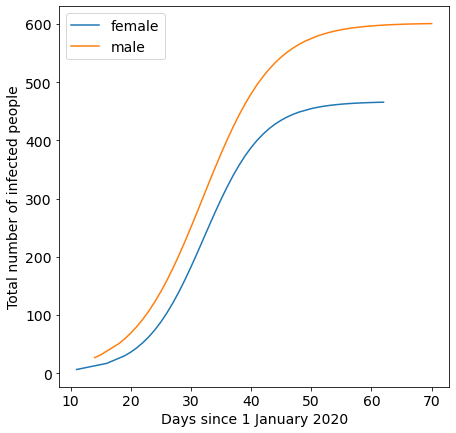

In [51]:
for sex in time_sex['sex'].unique():
    print(sex)
    df_log = time_sex.loc[time_sex['sex']==sex]

    if len(df_log) > 2:
        FMT = '%Y-%m-%d %H:%M:%S'
        date = df_log['date_confirmation']
        df_log['date_confirmation'] = date.map(lambda x : (x - datetime.strptime("2020-01-01 00:00:00", FMT)).days)

        display(df_log)

        def logistic_model(x,a,b,c):
            return c/(1+np.exp(-(x-b)/a))

        x = list(df_log['date_confirmation'])
        y = list(df_log['cum_sum'])

        p0 = np.random.exponential(size=3)

        bounds = (0, [100000.,3.,1000000000.])

        fit = curve_fit(logistic_model,x,y,p0=[2,100,20000])
        # fit = curve_fit(logistic_model,x,y,bounds=bounds,p0=p0)

        print('fit: ')
        print(fit)
        a = fit[0][0]
        b = fit[0][1]
        c = fit[0][2]

        errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
        print('errors')
        print(errors)

        sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
        print('sol')
        print(sol)

        pred_x = list(range(max(x),sol))
        plt.rcParams['figure.figsize'] = [7, 7]
        plt.rc('font', size=14)
        # Real data
        # plt.scatter(x,y,label="Real data",color="red")
        # Predicted logistic curve
        plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label=sex)
        # Predicted exponential curve
        # plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
        plt.legend()
        plt.xlabel("Days since 1 January 2020")
        plt.ylabel("Total number of infected people")
        # plt.ylim((min(y)*0.9,c*1.1))
        
        y_pred_logistic = [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x]
        mean_squared_error(y,y_pred_logistic)
plt.show()